**In this notebook we compare different torch optimizers applied for solving transport task**

In [37]:
from model import Model
from data_reader.data_reader import *
from torch import optim
from matplotlib import pyplot as plt
from time import time

In [38]:
data_reader = DataReader()
data_reader.read_all("data/Anaheim_net.tntp", "data/Anaheim_trips.tntp", "data/Anaheim_flow.tntp")

In [39]:
num_iters=10000

**General solve function wrapper, measures work time**

In [40]:
def solve(model, optimizer, num_iters=num_iters, loss_history=True, verbose=True):    
    start_time = time()

    flows, primal_values = model.solve(optimizer, num_iters=num_iters, loss_history=loss_history, verbose=verbose)

    end_time = time()
    
    seconds_elapsed = end_time - start_time
    print("Time elapsed:", seconds_elapsed, "seconds")

    avg_step_time = seconds_elapsed / num_iters
    print("Average step time:", avg_step_time, "seconds")
    
    return flows, primal_values, seconds_elapsed

# Check if graph correspondences are satisfied
def check_graph(model, flows):
    return model.graph.check_graph(flows, model.graph_correspondences)

# SGD

In [41]:
# model saves progress
sgd_model = Model(data_reader)
sgd_optimizer = optim.SGD([sgd_model.t], lr=0.0000004, momentum=0.9)

In [42]:
sgd_flows, sgd_primal_vals, sgd_seconds = solve(sgd_model, sgd_optimizer)

i = 0 , primal_value= 1264517.8831331283
i = 10 , primal_value= 1244276.5122606012
i = 20 , primal_value= 1216725.6051949584
i = 30 , primal_value= 1211116.1099770833
i = 40 , primal_value= 1209672.653669013
i = 50 , primal_value= 1208893.3173123428
i = 60 , primal_value= 1208324.7676676123
i = 70 , primal_value= 1207965.0903262286
i = 80 , primal_value= 1207696.751787162
i = 90 , primal_value= 1207487.0372875263
i = 100 , primal_value= 1207293.9682777463
i = 110 , primal_value= 1206983.0631957834
i = 120 , primal_value= 1206877.7059622884
i = 130 , primal_value= 1206739.047695253
i = 140 , primal_value= 1206606.1205247783
i = 150 , primal_value= 1206482.2846072358
i = 160 , primal_value= 1206396.1164212544
i = 170 , primal_value= 1206320.856046097
i = 180 , primal_value= 1206260.527747014
i = 190 , primal_value= 1206208.925653757
i = 200 , primal_value= 1206148.0102778913
i = 210 , primal_value= 1206115.7484534362
i = 220 , primal_value= 1206064.192634035
i = 230 , primal_value= 12060

i = 1900 , primal_value= 1205702.8315695636
i = 1910 , primal_value= 1205702.6729208296
i = 1920 , primal_value= 1205702.6789890006
i = 1930 , primal_value= 1205702.6548614034
i = 1940 , primal_value= 1205702.6368354848
i = 1950 , primal_value= 1205702.5737137743
i = 1960 , primal_value= 1205702.6141711066
i = 1970 , primal_value= 1205702.5926589193
i = 1980 , primal_value= 1205702.5957363988
i = 1990 , primal_value= 1205702.5690771902
i = 2000 , primal_value= 1205702.5149227765
i = 2010 , primal_value= 1205702.5236112438
i = 2020 , primal_value= 1205702.5567387189
i = 2030 , primal_value= 1205702.4998212992
i = 2040 , primal_value= 1205702.436008569
i = 2050 , primal_value= 1205702.3795886782
i = 2060 , primal_value= 1205702.3770275293
i = 2070 , primal_value= 1205702.2899129381
i = 2080 , primal_value= 1205702.4158278948
i = 2090 , primal_value= 1205702.3500609908
i = 2100 , primal_value= 1205702.3228626149
i = 2110 , primal_value= 1205702.249796716
i = 2120 , primal_value= 1205702.2

i = 3780 , primal_value= 1205304.553369987
i = 3790 , primal_value= 1205302.825679863
i = 3800 , primal_value= 1205301.0567258636
i = 3810 , primal_value= 1205299.3482130277
i = 3820 , primal_value= 1205297.66295122
i = 3830 , primal_value= 1205295.9079480956
i = 3840 , primal_value= 1205294.2047912437
i = 3850 , primal_value= 1205292.4877450378
i = 3860 , primal_value= 1205290.8154682464
i = 3870 , primal_value= 1205289.1589731222
i = 3880 , primal_value= 1205287.420644147
i = 3890 , primal_value= 1205285.779428708
i = 3900 , primal_value= 1205284.0861666228
i = 3910 , primal_value= 1205282.467822978
i = 3920 , primal_value= 1205280.7807430362
i = 3930 , primal_value= 1205279.2117311456
i = 3940 , primal_value= 1205277.5671999392
i = 3950 , primal_value= 1205275.9355311296
i = 3960 , primal_value= 1205274.349245182
i = 3970 , primal_value= 1205272.7120878578
i = 3980 , primal_value= 1205271.1325083575
i = 3990 , primal_value= 1205269.5986272455
i = 4000 , primal_value= 1205267.9709788

i = 5660 , primal_value= 1205426.224336746
i = 5670 , primal_value= 1205428.5497927165
i = 5680 , primal_value= 1205430.8951981573
i = 5690 , primal_value= 1205433.2063136864
i = 5700 , primal_value= 1205435.5252638864
i = 5710 , primal_value= 1205437.8266610878
i = 5720 , primal_value= 1205440.1355557302
i = 5730 , primal_value= 1205442.4287488235
i = 5740 , primal_value= 1205444.707657521
i = 5750 , primal_value= 1205446.9965128275
i = 5760 , primal_value= 1205449.2543440193
i = 5770 , primal_value= 1205451.532915056
i = 5780 , primal_value= 1205453.7697833222
i = 5790 , primal_value= 1205456.0361719031
i = 5800 , primal_value= 1205458.2655391367
i = 5810 , primal_value= 1205460.513074943
i = 5820 , primal_value= 1205462.740798746
i = 5830 , primal_value= 1205464.9506145744
i = 5840 , primal_value= 1205467.1644140952
i = 5850 , primal_value= 1205469.3614892114
i = 5860 , primal_value= 1205471.5610026633
i = 5870 , primal_value= 1205473.7570146765
i = 5880 , primal_value= 1205475.9404

i = 7540 , primal_value= 1205757.5318231832
i = 7550 , primal_value= 1205758.8564941653
i = 7560 , primal_value= 1205760.170771888
i = 7570 , primal_value= 1205761.4823659565
i = 7580 , primal_value= 1205762.7788747163
i = 7590 , primal_value= 1205764.0819057547
i = 7600 , primal_value= 1205765.3972035672
i = 7610 , primal_value= 1205766.6726172
i = 7620 , primal_value= 1205767.9798304099
i = 7630 , primal_value= 1205769.2779923077
i = 7640 , primal_value= 1205770.5490234962
i = 7650 , primal_value= 1205771.8431242895
i = 7660 , primal_value= 1205773.1301190385
i = 7670 , primal_value= 1205774.3935560153
i = 7680 , primal_value= 1205775.652619505
i = 7690 , primal_value= 1205776.9060655788
i = 7700 , primal_value= 1205778.1777093336
i = 7710 , primal_value= 1205779.4530622931
i = 7720 , primal_value= 1205780.694007677
i = 7730 , primal_value= 1205781.8565355705
i = 7740 , primal_value= 1205783.108839804
i = 7750 , primal_value= 1205784.348297119
i = 7760 , primal_value= 1205785.6047465

i = 9420 , primal_value= 1205955.0038193648
i = 9430 , primal_value= 1205955.869254184
i = 9440 , primal_value= 1205956.711953332
i = 9450 , primal_value= 1205957.5615364294
i = 9460 , primal_value= 1205958.418864871
i = 9470 , primal_value= 1205959.265338765
i = 9480 , primal_value= 1205960.1062067307
i = 9490 , primal_value= 1205958.6363171348
i = 9500 , primal_value= 1205955.1201744524
i = 9510 , primal_value= 1205951.4700365372
i = 9520 , primal_value= 1205947.829257363
i = 9530 , primal_value= 1205944.3283394957
i = 9540 , primal_value= 1205940.6974898523
i = 9550 , primal_value= 1205937.086931157
i = 9560 , primal_value= 1205933.6125380618
i = 9570 , primal_value= 1205930.0224815349
i = 9580 , primal_value= 1205926.4187941088
i = 9590 , primal_value= 1205922.8340941614
i = 9600 , primal_value= 1205919.398871104
i = 9610 , primal_value= 1205915.8302546924
i = 9620 , primal_value= 1205912.2597928368
i = 9630 , primal_value= 1205908.8423070838
i = 9640 , primal_value= 1205905.290363

# RMSprop

In [43]:
rmsprop_model = Model(data_reader)
rmsprop_optimizer = optim.RMSprop([rmsprop_model.t], lr=0.005)

In [44]:
rmsprop_flows, rmsprop_primal_vals, rmsprop_seconds = solve(rmsprop_model, rmsprop_optimizer)

i = 0 , primal_value= 1264517.8831331283
i = 10 , primal_value= 1215341.803267873
i = 20 , primal_value= 1211572.2234562333
i = 30 , primal_value= 1209492.4885066145
i = 40 , primal_value= 1208695.0639472262
i = 50 , primal_value= 1208138.2893128411
i = 60 , primal_value= 1207760.179338857
i = 70 , primal_value= 1207494.2846403348
i = 80 , primal_value= 1207213.5134561362
i = 90 , primal_value= 1206970.9261950704
i = 100 , primal_value= 1206804.7139968954
i = 110 , primal_value= 1206611.4301615173
i = 120 , primal_value= 1206490.0808432526
i = 130 , primal_value= 1206381.718730696
i = 140 , primal_value= 1206296.2932158588
i = 150 , primal_value= 1206215.1298310691
i = 160 , primal_value= 1206152.2832476841
i = 170 , primal_value= 1206102.267182814
i = 180 , primal_value= 1206055.9031687137
i = 190 , primal_value= 1206013.8104192107
i = 200 , primal_value= 1205981.6019769707
i = 210 , primal_value= 1205947.6762317966
i = 220 , primal_value= 1205925.3573918645
i = 230 , primal_value= 12

i = 1910 , primal_value= 1205715.6447807772
i = 1920 , primal_value= 1205715.7423716965
i = 1930 , primal_value= 1205715.7179644003
i = 1940 , primal_value= 1205715.7421520907
i = 1950 , primal_value= 1205715.665089997
i = 1960 , primal_value= 1205715.7899053285
i = 1970 , primal_value= 1205715.7309845572
i = 1980 , primal_value= 1205715.768316098
i = 1990 , primal_value= 1205715.784237832
i = 2000 , primal_value= 1205715.8266860934
i = 2010 , primal_value= 1205715.9377512294
i = 2020 , primal_value= 1205715.907864283
i = 2030 , primal_value= 1205715.9312688096
i = 2040 , primal_value= 1205715.8795759338
i = 2050 , primal_value= 1205715.9496500986
i = 2060 , primal_value= 1205715.9028472062
i = 2070 , primal_value= 1205715.847491869
i = 2080 , primal_value= 1205716.0097971864
i = 2090 , primal_value= 1205716.000062547
i = 2100 , primal_value= 1205715.9402580494
i = 2110 , primal_value= 1205715.9709605465
i = 2120 , primal_value= 1205716.1285288832
i = 2130 , primal_value= 1205716.05711

i = 3790 , primal_value= 1205319.8513532823
i = 3800 , primal_value= 1205318.0567702104
i = 3810 , primal_value= 1205316.3797391115
i = 3820 , primal_value= 1205314.701223426
i = 3830 , primal_value= 1205312.9680852622
i = 3840 , primal_value= 1205311.2869888488
i = 3850 , primal_value= 1205309.558788737
i = 3860 , primal_value= 1205307.921175353
i = 3870 , primal_value= 1205306.250275695
i = 3880 , primal_value= 1205304.516781654
i = 3890 , primal_value= 1205302.9081302844
i = 3900 , primal_value= 1205301.2391123322
i = 3910 , primal_value= 1205299.6235988229
i = 3920 , primal_value= 1205297.982297465
i = 3930 , primal_value= 1205296.3719105567
i = 3940 , primal_value= 1205294.817372415
i = 3950 , primal_value= 1205293.1959402075
i = 3960 , primal_value= 1205291.595819889
i = 3970 , primal_value= 1205289.9639179127
i = 3980 , primal_value= 1205288.4105379474
i = 3990 , primal_value= 1205286.8837608574
i = 4000 , primal_value= 1205285.2645963386
i = 4010 , primal_value= 1205283.7357947

i = 5670 , primal_value= 1205447.1309700613
i = 5680 , primal_value= 1205449.4570361846
i = 5690 , primal_value= 1205451.809279856
i = 5700 , primal_value= 1205454.13684888
i = 5710 , primal_value= 1205456.4337098456
i = 5720 , primal_value= 1205458.748822752
i = 5730 , primal_value= 1205461.0436487312
i = 5740 , primal_value= 1205463.3692811374
i = 5750 , primal_value= 1205465.646707176
i = 5760 , primal_value= 1205467.932157913
i = 5770 , primal_value= 1205470.1965039966
i = 5780 , primal_value= 1205472.4751531896
i = 5790 , primal_value= 1205474.721592429
i = 5800 , primal_value= 1205476.9768645228
i = 5810 , primal_value= 1205479.225008599
i = 5820 , primal_value= 1205481.4971761007
i = 5830 , primal_value= 1205483.6972886804
i = 5840 , primal_value= 1205485.9250679924
i = 5850 , primal_value= 1205488.1543019915
i = 5860 , primal_value= 1205490.3585183567
i = 5870 , primal_value= 1205492.5403141112
i = 5880 , primal_value= 1205494.744929549
i = 5890 , primal_value= 1205496.94397432

i = 7550 , primal_value= 1205778.8028769954
i = 7560 , primal_value= 1205780.140568617
i = 7570 , primal_value= 1205781.432471988
i = 7580 , primal_value= 1205782.7360525155
i = 7590 , primal_value= 1205784.0571616103
i = 7600 , primal_value= 1205785.3547304226
i = 7610 , primal_value= 1205786.6605548381
i = 7620 , primal_value= 1205787.953763038
i = 7630 , primal_value= 1205789.2486905167
i = 7640 , primal_value= 1205790.5376377911
i = 7650 , primal_value= 1205791.835223873
i = 7660 , primal_value= 1205793.107028638
i = 7670 , primal_value= 1205794.4003361433
i = 7680 , primal_value= 1205795.6384991268
i = 7690 , primal_value= 1205796.9250265406
i = 7700 , primal_value= 1205798.1889635876
i = 7710 , primal_value= 1205799.4463424715
i = 7720 , primal_value= 1205800.711156516
i = 7730 , primal_value= 1205801.897824094
i = 7740 , primal_value= 1205803.1307322974
i = 7750 , primal_value= 1205804.3799927384
i = 7760 , primal_value= 1205805.6323445286
i = 7770 , primal_value= 1205806.863161

i = 9430 , primal_value= 1205977.0552183455
i = 9440 , primal_value= 1205977.8938254784
i = 9450 , primal_value= 1205978.7420953605
i = 9460 , primal_value= 1205979.6069915255
i = 9470 , primal_value= 1205980.4603143153
i = 9480 , primal_value= 1205981.3043840053
i = 9490 , primal_value= 1205979.8141317447
i = 9500 , primal_value= 1205976.311709747
i = 9510 , primal_value= 1205972.664690235
i = 9520 , primal_value= 1205969.0082331272
i = 9530 , primal_value= 1205965.5254146485
i = 9540 , primal_value= 1205961.8928975544
i = 9550 , primal_value= 1205958.289663956
i = 9560 , primal_value= 1205954.8330178203
i = 9570 , primal_value= 1205951.2282693272
i = 9580 , primal_value= 1205947.6327974016
i = 9590 , primal_value= 1205944.0487745043
i = 9600 , primal_value= 1205940.6194280474
i = 9610 , primal_value= 1205937.0425823592
i = 9620 , primal_value= 1205933.4769810985
i = 9630 , primal_value= 1205930.0698081208
i = 9640 , primal_value= 1205926.5260873018
i = 9650 , primal_value= 1205922.99

# Adam

In [45]:
adam_model = Model(data_reader)
adam_optimizer = optim.Adam([adam_model.t], lr=0.01)

In [46]:
adam_flows, adam_primal_vals, adam_seconds = solve(adam_model, adam_optimizer)

i = 0 , primal_value= 1264517.8831331283
i = 10 , primal_value= 1234327.2433667772
i = 20 , primal_value= 1216214.019592973
i = 30 , primal_value= 1211785.0660178077
i = 40 , primal_value= 1210221.9778038468
i = 50 , primal_value= 1209275.9453275113
i = 60 , primal_value= 1208661.7397517883
i = 70 , primal_value= 1208167.7003619238
i = 80 , primal_value= 1207818.06709261
i = 90 , primal_value= 1207458.056537335
i = 100 , primal_value= 1207162.3182415436
i = 110 , primal_value= 1206923.1201333704
i = 120 , primal_value= 1206738.2750089464
i = 130 , primal_value= 1206580.4043143666
i = 140 , primal_value= 1206469.6271784974
i = 150 , primal_value= 1206350.650760039
i = 160 , primal_value= 1206278.6874435127
i = 170 , primal_value= 1206214.5323160607
i = 180 , primal_value= 1206151.1402787876
i = 190 , primal_value= 1206100.0601563423
i = 200 , primal_value= 1206058.474251687
i = 210 , primal_value= 1206015.10224754
i = 220 , primal_value= 1205986.676173401
i = 230 , primal_value= 1205961

i = 1910 , primal_value= 1205703.1007110646
i = 1920 , primal_value= 1205703.0901107215
i = 1930 , primal_value= 1205703.183605246
i = 1940 , primal_value= 1205703.1662601065
i = 1950 , primal_value= 1205703.1037318157
i = 1960 , primal_value= 1205703.098754337
i = 1970 , primal_value= 1205703.1370830233
i = 1980 , primal_value= 1205703.1392622765
i = 1990 , primal_value= 1205703.1239309825
i = 2000 , primal_value= 1205703.1629233758
i = 2010 , primal_value= 1205703.19636514
i = 2020 , primal_value= 1205703.2165568604
i = 2030 , primal_value= 1205703.145441799
i = 2040 , primal_value= 1205703.1938099787
i = 2050 , primal_value= 1205703.1835575595
i = 2060 , primal_value= 1205703.0682191919
i = 2070 , primal_value= 1205703.0855810866
i = 2080 , primal_value= 1205703.1024083353
i = 2090 , primal_value= 1205703.1432187438
i = 2100 , primal_value= 1205703.0649198294
i = 2110 , primal_value= 1205703.0198048488
i = 2120 , primal_value= 1205703.172300766
i = 2130 , primal_value= 1205703.07213

i = 3790 , primal_value= 1205304.9430217044
i = 3800 , primal_value= 1205303.1495237432
i = 3810 , primal_value= 1205301.4468305772
i = 3820 , primal_value= 1205299.7645058252
i = 3830 , primal_value= 1205298.004201561
i = 3840 , primal_value= 1205296.3279741167
i = 3850 , primal_value= 1205294.5809144508
i = 3860 , primal_value= 1205292.93904799
i = 3870 , primal_value= 1205291.285370676
i = 3880 , primal_value= 1205289.56293379
i = 3890 , primal_value= 1205287.946437135
i = 3900 , primal_value= 1205286.2119384923
i = 3910 , primal_value= 1205284.6481542806
i = 3920 , primal_value= 1205282.9520201797
i = 3930 , primal_value= 1205281.348644037
i = 3940 , primal_value= 1205279.7694517847
i = 3950 , primal_value= 1205278.1221498477
i = 3960 , primal_value= 1205276.522005727
i = 3970 , primal_value= 1205274.8766485387
i = 3980 , primal_value= 1205273.3179806191
i = 3990 , primal_value= 1205271.7675412602
i = 4000 , primal_value= 1205270.1451967186
i = 4010 , primal_value= 1205268.63049375

i = 5670 , primal_value= 1205431.135482588
i = 5680 , primal_value= 1205433.4713768894
i = 5690 , primal_value= 1205435.7993684043
i = 5700 , primal_value= 1205438.1200291167
i = 5710 , primal_value= 1205440.4240914583
i = 5720 , primal_value= 1205442.7463628957
i = 5730 , primal_value= 1205445.0303984473
i = 5740 , primal_value= 1205447.3144065957
i = 5750 , primal_value= 1205449.612473993
i = 5760 , primal_value= 1205451.8724187368
i = 5770 , primal_value= 1205454.122499713
i = 5780 , primal_value= 1205456.3958728123
i = 5790 , primal_value= 1205458.650559627
i = 5800 , primal_value= 1205460.888015075
i = 5810 , primal_value= 1205463.1390488266
i = 5820 , primal_value= 1205465.354310904
i = 5830 , primal_value= 1205467.5658108713
i = 5840 , primal_value= 1205469.788807034
i = 5850 , primal_value= 1205471.98208856
i = 5860 , primal_value= 1205474.1910994686
i = 5870 , primal_value= 1205476.3796239032
i = 5880 , primal_value= 1205478.5689970024
i = 5890 , primal_value= 1205480.74631322

i = 7550 , primal_value= 1205761.7578575371
i = 7560 , primal_value= 1205763.0548750893
i = 7570 , primal_value= 1205764.3665833424
i = 7580 , primal_value= 1205765.6721543926
i = 7590 , primal_value= 1205766.9855938195
i = 7600 , primal_value= 1205768.2917224057
i = 7610 , primal_value= 1205769.5920565978
i = 7620 , primal_value= 1205770.8813354168
i = 7630 , primal_value= 1205772.1927516332
i = 7640 , primal_value= 1205773.4730191259
i = 7650 , primal_value= 1205774.7506552022
i = 7660 , primal_value= 1205776.0424956526
i = 7670 , primal_value= 1205777.3119556261
i = 7680 , primal_value= 1205778.5704225358
i = 7690 , primal_value= 1205779.847057272
i = 7700 , primal_value= 1205781.0924638147
i = 7710 , primal_value= 1205782.365508347
i = 7720 , primal_value= 1205783.613426139
i = 7730 , primal_value= 1205784.7801465201
i = 7740 , primal_value= 1205786.0367250533
i = 7750 , primal_value= 1205787.2746677932
i = 7760 , primal_value= 1205788.5188099747
i = 7770 , primal_value= 1205789.75

i = 9430 , primal_value= 1205959.0604830808
i = 9440 , primal_value= 1205959.8983719626
i = 9450 , primal_value= 1205960.7686207697
i = 9460 , primal_value= 1205961.619491699
i = 9470 , primal_value= 1205962.4772638914
i = 9480 , primal_value= 1205963.3202890113
i = 9490 , primal_value= 1205961.8468768941
i = 9500 , primal_value= 1205958.3374613877
i = 9510 , primal_value= 1205954.682539705
i = 9520 , primal_value= 1205951.051615802
i = 9530 , primal_value= 1205947.5726269993
i = 9540 , primal_value= 1205943.9376317912
i = 9550 , primal_value= 1205940.327914211
i = 9560 , primal_value= 1205936.8647386965
i = 9570 , primal_value= 1205933.2644967632
i = 9580 , primal_value= 1205929.6849700974
i = 9590 , primal_value= 1205926.0935942365
i = 9600 , primal_value= 1205922.6667494108
i = 9610 , primal_value= 1205919.1033877165
i = 9620 , primal_value= 1205915.559127796
i = 9630 , primal_value= 1205912.1405846067
i = 9640 , primal_value= 1205908.5988088385
i = 9650 , primal_value= 1205905.0786

# ASGD

In [47]:
asgd_model = Model(data_reader)
asgd_optimizer = optim.ASGD([asgd_model.t], lr=0.000005)

In [48]:
asgd_flows, asgd_primal_vals, asgd_seconds = solve(asgd_model, asgd_optimizer)

i = 0 , primal_value= 1264517.8831331283
i = 10 , primal_value= 1218425.7751907436
i = 20 , primal_value= 1212483.1747604928
i = 30 , primal_value= 1210000.8790659562
i = 40 , primal_value= 1208937.0337435133
i = 50 , primal_value= 1208279.96486148
i = 60 , primal_value= 1207880.2990330271
i = 70 , primal_value= 1207590.6981156026
i = 80 , primal_value= 1207397.8283374852
i = 90 , primal_value= 1207110.7804289341
i = 100 , primal_value= 1206855.9413334762
i = 110 , primal_value= 1206659.5442015522
i = 120 , primal_value= 1206542.2874327125
i = 130 , primal_value= 1206428.138777179
i = 140 , primal_value= 1206325.3181540752
i = 150 , primal_value= 1206257.7886384027
i = 160 , primal_value= 1206185.8700311452
i = 170 , primal_value= 1206142.260291027
i = 180 , primal_value= 1206096.6950476016
i = 190 , primal_value= 1206055.5185503382
i = 200 , primal_value= 1206019.773913241
i = 210 , primal_value= 1206008.5757669767
i = 220 , primal_value= 1205968.1035666694
i = 230 , primal_value= 120

i = 1900 , primal_value= 1205746.4781555557
i = 1910 , primal_value= 1205746.4578009213
i = 1920 , primal_value= 1205746.4587949687
i = 1930 , primal_value= 1205746.5633405212
i = 1940 , primal_value= 1205746.457231143
i = 1950 , primal_value= 1205746.4777075213
i = 1960 , primal_value= 1205746.5893952658
i = 1970 , primal_value= 1205746.5560960504
i = 1980 , primal_value= 1205746.4994292043
i = 1990 , primal_value= 1205746.4512928326
i = 2000 , primal_value= 1205746.5550655806
i = 2010 , primal_value= 1205746.6176025332
i = 2020 , primal_value= 1205746.6193318015
i = 2030 , primal_value= 1205746.63744597
i = 2040 , primal_value= 1205746.598452726
i = 2050 , primal_value= 1205746.7204886803
i = 2060 , primal_value= 1205746.5183553267
i = 2070 , primal_value= 1205746.5225353201
i = 2080 , primal_value= 1205746.635744674
i = 2090 , primal_value= 1205746.658151705
i = 2100 , primal_value= 1205746.523441803
i = 2110 , primal_value= 1205746.5387909685
i = 2120 , primal_value= 1205746.608474

i = 3780 , primal_value= 1205350.7754852914
i = 3790 , primal_value= 1205349.0710060045
i = 3800 , primal_value= 1205347.235330934
i = 3810 , primal_value= 1205345.5650833978
i = 3820 , primal_value= 1205343.8737994153
i = 3830 , primal_value= 1205342.014217985
i = 3840 , primal_value= 1205340.3686491926
i = 3850 , primal_value= 1205338.5883131498
i = 3860 , primal_value= 1205336.9402965056
i = 3870 , primal_value= 1205335.4254410425
i = 3880 , primal_value= 1205333.7211959583
i = 3890 , primal_value= 1205332.1591159124
i = 3900 , primal_value= 1205330.4979580275
i = 3910 , primal_value= 1205328.8234275347
i = 3920 , primal_value= 1205327.18598397
i = 3930 , primal_value= 1205325.6399507057
i = 3940 , primal_value= 1205324.024989289
i = 3950 , primal_value= 1205322.2552907413
i = 3960 , primal_value= 1205320.8320359928
i = 3970 , primal_value= 1205319.1291264768
i = 3980 , primal_value= 1205317.6484485832
i = 3990 , primal_value= 1205316.1635898992
i = 4000 , primal_value= 1205314.5050

i = 5660 , primal_value= 1205473.216396501
i = 5670 , primal_value= 1205475.536510141
i = 5680 , primal_value= 1205477.9365760754
i = 5690 , primal_value= 1205480.244271033
i = 5700 , primal_value= 1205482.6097274476
i = 5710 , primal_value= 1205484.9172352506
i = 5720 , primal_value= 1205487.2011747216
i = 5730 , primal_value= 1205489.5436598097
i = 5740 , primal_value= 1205491.7914534216
i = 5750 , primal_value= 1205494.1201689916
i = 5760 , primal_value= 1205496.3432155836
i = 5770 , primal_value= 1205498.5806282868
i = 5780 , primal_value= 1205500.8807913624
i = 5790 , primal_value= 1205503.1523526283
i = 5800 , primal_value= 1205505.405773812
i = 5810 , primal_value= 1205507.632285361
i = 5820 , primal_value= 1205509.8816493913
i = 5830 , primal_value= 1205512.1319698726
i = 5840 , primal_value= 1205514.3611188855
i = 5850 , primal_value= 1205516.4993141352
i = 5860 , primal_value= 1205518.7399270681
i = 5870 , primal_value= 1205520.9508060853
i = 5880 , primal_value= 1205523.1367

i = 7540 , primal_value= 1205805.8949898626
i = 7550 , primal_value= 1205807.220550168
i = 7560 , primal_value= 1205808.4898442042
i = 7570 , primal_value= 1205809.8019218568
i = 7580 , primal_value= 1205811.129316841
i = 7590 , primal_value= 1205812.4457211378
i = 7600 , primal_value= 1205813.7874462644
i = 7610 , primal_value= 1205815.0565057562
i = 7620 , primal_value= 1205816.3973189867
i = 7630 , primal_value= 1205817.6504278434
i = 7640 , primal_value= 1205818.8918009107
i = 7650 , primal_value= 1205820.1908057716
i = 7660 , primal_value= 1205821.4262813805
i = 7670 , primal_value= 1205822.7772471113
i = 7680 , primal_value= 1205824.0402522606
i = 7690 , primal_value= 1205825.281346529
i = 7700 , primal_value= 1205826.5676029858
i = 7710 , primal_value= 1205827.8407123121
i = 7720 , primal_value= 1205829.0993038774
i = 7730 , primal_value= 1205830.2616580422
i = 7740 , primal_value= 1205831.509272021
i = 7750 , primal_value= 1205832.7683275277
i = 7760 , primal_value= 1205834.056

i = 9420 , primal_value= 1206004.7598473853
i = 9430 , primal_value= 1206005.6058722306
i = 9440 , primal_value= 1206006.4917294288
i = 9450 , primal_value= 1206007.3251488297
i = 9460 , primal_value= 1206008.2005212612
i = 9470 , primal_value= 1206009.0384378415
i = 9480 , primal_value= 1206009.8841473476
i = 9490 , primal_value= 1206008.4286875064
i = 9500 , primal_value= 1206004.9288879496
i = 9510 , primal_value= 1206001.2842069983
i = 9520 , primal_value= 1205997.6689949809
i = 9530 , primal_value= 1205994.1930661688
i = 9540 , primal_value= 1205990.5852673936
i = 9550 , primal_value= 1205986.966340012
i = 9560 , primal_value= 1205983.508293985
i = 9570 , primal_value= 1205979.8967122284
i = 9580 , primal_value= 1205976.2994518394
i = 9590 , primal_value= 1205972.719424735
i = 9600 , primal_value= 1205969.272061145
i = 9610 , primal_value= 1205965.7032685606
i = 9620 , primal_value= 1205962.1879481769
i = 9630 , primal_value= 1205958.7526399684
i = 9640 , primal_value= 1205955.232

# All methods in one plot

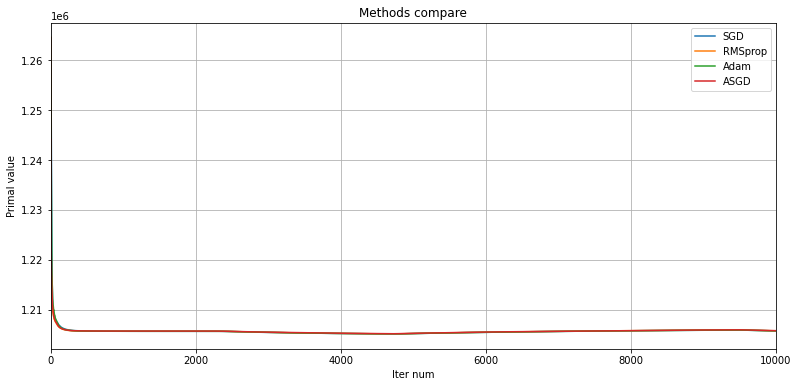

In [49]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_iters), sgd_primal_vals, label='SGD')
plt.plot(range(num_iters), rmsprop_primal_vals, label='RMSprop')
plt.plot(range(num_iters), adam_primal_vals, label='Adam')
plt.plot(range(num_iters), asgd_primal_vals, label='ASGD')

plt.title('Methods compare')
plt.xlim((-1, num_iters+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

# First 200 iterations

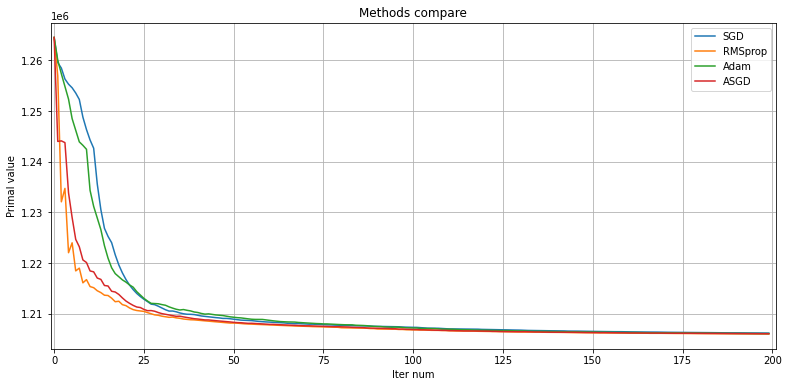

In [50]:
lim=200
plt.figure(figsize=(13, 6))
plt.plot(range(lim), sgd_primal_vals[:lim], label='SGD')
plt.plot(range(lim), rmsprop_primal_vals[:lim], label='RMSprop')
plt.plot(range(lim), adam_primal_vals[:lim], label='Adam')
plt.plot(range(lim), asgd_primal_vals[:lim], label='ASGD')

plt.title('Methods compare')
plt.xlim((-1, lim+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel('Primal value')
plt.grid()
plt.show()

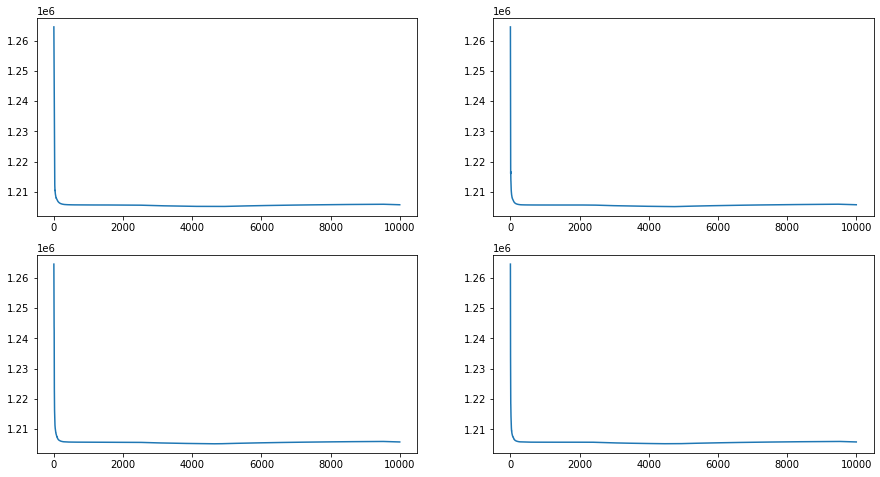

In [51]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax[0, 0].plot(range(num_iters), sgd_primal_vals, label='SGD')
ax[0, 1].plot(range(num_iters), rmsprop_primal_vals, label='RMSprop')
ax[1, 0].plot(range(num_iters), adam_primal_vals, label='Adam')
ax[1, 1].plot(range(num_iters), asgd_primal_vals, label='ASGD')

plt.show()